### 新增章节：使用 Scikit-learn 示例数据集的预测实践

为了进一步展示 **CatBoost** 的使用，我们将结合 Scikit-learn 的经典数据集 **California Housing**，演示如何使用 CatBoost 进行回归预测。这一实践可以帮助读者快速上手 CatBoost，在日常实验和项目中应用它。

---

## 示例数据集简介

California Housing 数据集包含加利福尼亚州 20,640 个街区的人口、住房和收入信息。目标是预测每个街区的房价中位数 `MedHouseVal`。

### 数据特征

1. `MedInc`：街区的收入中位数。
2. `HouseAge`：街区住房的平均年龄。
3. `AveRooms`：每个街区的平均房间数。
4. `AveBedrms`：每个街区的平均卧室数。
5. `Population`：街区的总人口。
6. `AveOccup`：每户的平均人数。
7. `Latitude`：街区的纬度。
8. `Longitude`：街区的经度。

---



## 实践步骤

### 1. 导入数据与预处理

我们使用 Scikit-learn 加载数据并进行预处理。


In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 加载 California Housing 数据集
data = fetch_california_housing(as_frame=True)
df = data.frame

# 特征和目标变量
X = df.drop(columns="MedHouseVal")
y = df["MedHouseVal"]

# 数据划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"训练集大小: {X_train.shape}, 测试集大小: {X_test.shape}")


训练集大小: (16512, 8), 测试集大小: (4128, 8)


### 2. 训练 CatBoost 回归模型

使用 CatBoost 对房价进行预测。


In [2]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 初始化 CatBoost 回归模型
cat_regressor = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    eval_metric="RMSE",
    random_seed=42,
    verbose=100
)

# 模型训练
cat_regressor.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100, early_stopping_rounds=50)

# 模型预测
y_pred_train = cat_regressor.predict(X_train)
y_pred_test = cat_regressor.predict(X_test)

# 模型评估
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"训练集均方误差 (MSE): {mse_train}")
print(f"测试集均方误差 (MSE): {mse_test}")
print(f"测试集平均绝对误差 (MAE): {mae_test}")


0:	learn: 1.0934740	test: 1.0841841	best: 1.0841841 (0)	total: 1.24s	remaining: 20m 38s
100:	learn: 0.4867395	test: 0.5154868	best: 0.5154868 (100)	total: 1.54s	remaining: 13.7s
200:	learn: 0.4320149	test: 0.4798269	best: 0.4798269 (200)	total: 1.8s	remaining: 7.18s
300:	learn: 0.4020581	test: 0.4657293	best: 0.4657293 (300)	total: 2.07s	remaining: 4.8s
400:	learn: 0.3803801	test: 0.4582868	best: 0.4582868 (400)	total: 2.35s	remaining: 3.5s
500:	learn: 0.3633580	test: 0.4534430	best: 0.4534430 (500)	total: 2.61s	remaining: 2.6s
600:	learn: 0.3488402	test: 0.4491723	best: 0.4491723 (600)	total: 2.89s	remaining: 1.92s
700:	learn: 0.3358611	test: 0.4461323	best: 0.4461323 (700)	total: 3.17s	remaining: 1.35s
800:	learn: 0.3234759	test: 0.4431320	best: 0.4431320 (800)	total: 3.44s	remaining: 854ms
900:	learn: 0.3126821	test: 0.4403978	best: 0.4403978 (900)	total: 3.71s	remaining: 407ms
999:	learn: 0.3025414	test: 0.4386906	best: 0.4386902 (998)	total: 3.97s	remaining: 0us

bestTest = 0.4386

### 3. 可视化预测结果

展示预测值与实际值的对比，以及模型的特征重要性。

#### 实际值与预测值对比


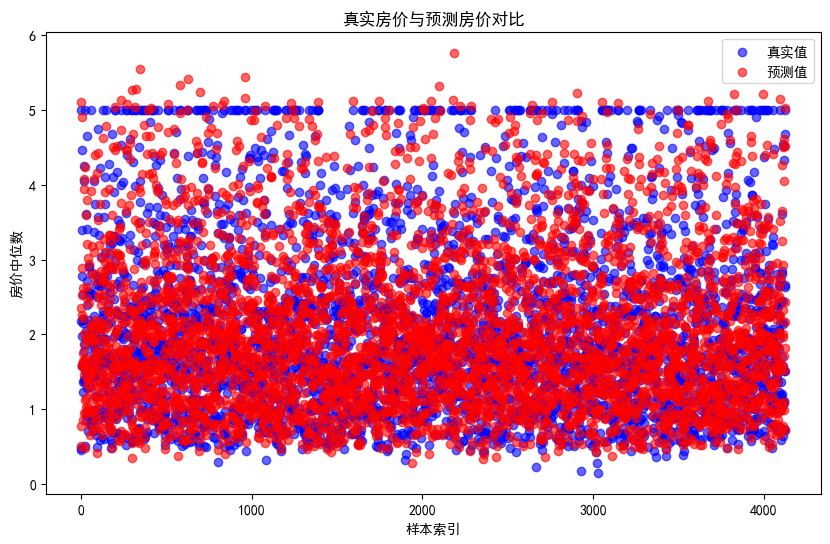

In [5]:
import matplotlib.pyplot as plt

# 设置字体，防止中文乱码
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 对比测试集的预测值和实际值
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", label="真实值", alpha=0.6)
plt.scatter(range(len(y_pred_test)), y_pred_test, color="red", label="预测值", alpha=0.6)
plt.title("真实房价与预测房价对比")
plt.xlabel("样本索引")
plt.ylabel("房价中位数")
plt.legend()
plt.show()


#### 特征重要性分析


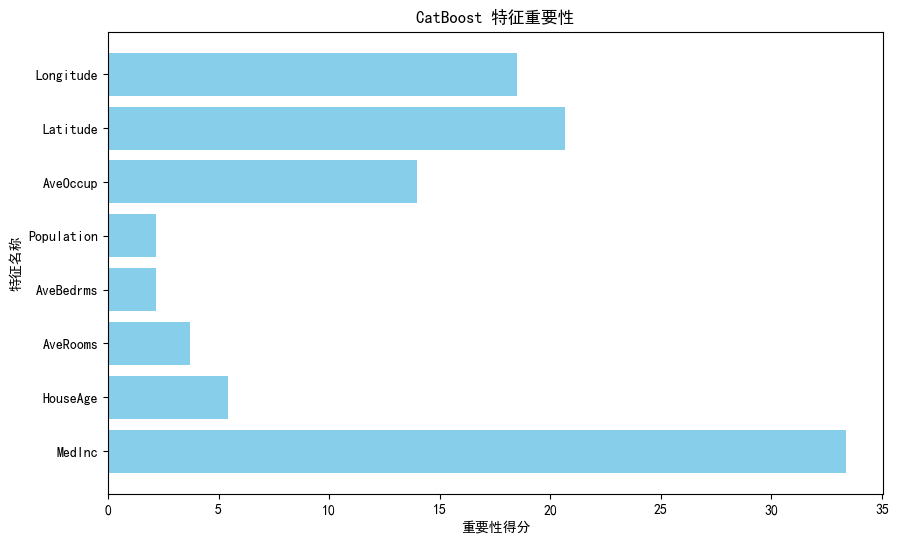

In [6]:
# 特征重要性可视化
feature_importances = cat_regressor.get_feature_importance()
feature_names = data.feature_names

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color="skyblue")
plt.title("CatBoost 特征重要性")
plt.xlabel("重要性得分")
plt.ylabel("特征名称")
plt.show()


## 结果

- 模型评估结果：

训练集均方误差 (MSE): 0.09158491090576551
测试集均方误差 (MSE): 0.19244906768098075
测试集平均绝对误差 (MAE): 0.28701415230111493

- 特征重要性解读：

根据特征重要性分析，MedInc（收入中位数）对预测房价的影响最大，而经纬度特征（Latitude 和 Longitude）也提供了显著的信息。

## 总结

本实践通过 Scikit-learn 的 **California Housing** 数据集展示了 CatBoost 在回归任务中的强大性能。特征重要性分析与结果可视化为理解模型提供了更直观的支持。

无论是日常研究还是实际应用，CatBoost 都是一款易用且高效的机器学习工具。希望您能在实际工作中尝试并发挥它的潜力！
